# Fitting the properties of a star cluster using `isochrones`



In [1]:
# Simulate a cluster
import pickle

import numpy as np
import pandas as pd

from isochrones import get_ichrone
from isochrones.priors import PowerLawPrior
from isochrones.utils import addmags
from isochrones.cluster import simulate_cluster

resim = True
if resim:
    N = 50

    age = 8.0
    feh = -0.42
    distance = 200.
    AV = 0.0
    alpha = -2
    gamma = 0.3
    fB = 0.5

    cat = simulate_cluster(N, age, feh, distance, AV, alpha, gamma, fB)
    
    cat.df.to_hdf('test_cluster.h5', 'df')
    pardict = dict(age=age, feh=feh, distance=distance, AV=AV, alpha=alpha, gamma=gamma, fB=fB)
    pickle.dump(pardict, open('test_cluster_params.pkl', 'wb'))
else:
    bands = 'JHK'
    stars = pd.read_hdf('test_cluster.h5')
    pardict = pickle.load(open('test_cluster_params.pkl', 'rb'))
    age = pardict['age']
    feh = pardict['feh']
    distance = pardict['distance']
    AV = pardict['AV']
    alpha = pardict['alpha']
    gamma = pardict['gamma']
    fB = pardict['fB']

In [2]:
cat.df.head()

,J_mag,H_mag,K_mag,is_binary,age,feh,distance,AV,mass_pri,mass_sec,eep_pri,eep_sec,J_mag_unc,H_mag_unc,K_mag_unc,parallax,parallax_unc
0,8.435677,8.325925,8.304757,True,8.0,-0.42,203.176590,0.0,1.359026,1.356795,261.671923,261.559643,0.01,0.01,0.01,4.921827,0.2
1,9.050041,8.961375,8.952934,False,8.0,-0.42,198.009479,0.0,1.415914,0.000000,264.731003,NaN,0.01,0.01,0.01,5.050263,0.2
2,8.947427,8.893473,8.892698,False,8.0,-0.42,202.756550,0.0,1.514407,0.000000,270.269062,NaN,0.01,0.01,0.01,4.932023,0.2
3,9.525714,9.348124,9.322268,False,8.0,-0.42,203.067171,0.0,1.218387,0.000000,255.649035,NaN,0.01,0.01,0.01,4.924479,0.2
4,8.395321,8.408289,8.399057,False,8.0,-0.42,208.977836,0.0,2.015060,0.000000,296.021877,NaN,0.01,0.01,0.01,4.785196,0.2


In [4]:
cat.hr

:Layout
   .Points.I  :Points   [J-K,J_mag]   (J_mag,H_mag,K_mag,is_binary,age,feh,distance,AV,mass_pri,mass_sec,eep_pri,eep_sec,J_mag_unc,H_mag_unc,K_mag_unc,parallax,parallax_unc,K,J-K,H-K)
   .Points.II :Points   [H-K,H_mag]   (J_mag,H_mag,K_mag,is_binary,age,feh,distance,AV,mass_pri,mass_sec,eep_pri,eep_sec,J_mag_unc,H_mag_unc,K_mag_unc,parallax,parallax_unc,K,J-K,H-K)

In [5]:
cat

In [6]:
cat.df.head()

,J_mag,H_mag,K_mag,is_binary,age,feh,distance,AV,mass_pri,mass_sec,eep_pri,eep_sec,J_mag_unc,H_mag_unc,K_mag_unc,parallax,parallax_unc
0,8.435677,8.325925,8.304757,True,8.0,-0.42,203.176590,0.0,1.359026,1.356795,261.671923,261.559643,0.01,0.01,0.01,4.921827,0.2
1,9.050041,8.961375,8.952934,False,8.0,-0.42,198.009479,0.0,1.415914,0.000000,264.731003,NaN,0.01,0.01,0.01,5.050263,0.2
2,8.947427,8.893473,8.892698,False,8.0,-0.42,202.756550,0.0,1.514407,0.000000,270.269062,NaN,0.01,0.01,0.01,4.932023,0.2
3,9.525714,9.348124,9.322268,False,8.0,-0.42,203.067171,0.0,1.218387,0.000000,255.649035,NaN,0.01,0.01,0.01,4.924479,0.2
4,8.395321,8.408289,8.399057,False,8.0,-0.42,208.977836,0.0,2.015060,0.000000,296.021877,NaN,0.01,0.01,0.01,4.785196,0.2


In [8]:
import pandas as pd

from isochrones.cluster import StarClusterModel
from isochrones import get_ichrone
from isochrones.priors import FehPrior
from isochrones.mist import MIST_Isochrone

mist = MIST_Isochrone()

model = StarClusterModel(mist, cat, eep_bounds=(202, 605), 
                         max_distance=3000, max_AV=0.1, name='test-binary')
model.set_prior('feh', FehPrior(halo_fraction=0.5))

print(model.param_names)

['age', 'feh', 'distance', 'AV', 'alpha', 'gamma', 'fB']


In [9]:
print(model.mnest_basename)

./chains/mist-cluster_test-binary-


In [10]:
pars = [age, feh, distance, AV, alpha, gamma, fB]
model.lnprior(pars), model.lnlike(pars), model.lnpost(pars)

AttributeError: 'MIST_Isochrone' object has no attribute 'initial_mass'

In [11]:
cat.df.head()

,J_mag,H_mag,K_mag,is_binary,age,feh,distance,AV,mass_pri,mass_sec,eep_pri,eep_sec,J_mag_unc,H_mag_unc,K_mag_unc,parallax,parallax_unc
0,8.435677,8.325925,8.304757,True,8.0,-0.42,203.176590,0.0,1.359026,1.356795,261.671923,261.559643,0.01,0.01,0.01,4.921827,0.2
1,9.050041,8.961375,8.952934,False,8.0,-0.42,198.009479,0.0,1.415914,0.000000,264.731003,NaN,0.01,0.01,0.01,5.050263,0.2
2,8.947427,8.893473,8.892698,False,8.0,-0.42,202.756550,0.0,1.514407,0.000000,270.269062,NaN,0.01,0.01,0.01,4.932023,0.2
3,9.525714,9.348124,9.322268,False,8.0,-0.42,203.067171,0.0,1.218387,0.000000,255.649035,NaN,0.01,0.01,0.01,4.924479,0.2
4,8.395321,8.408289,8.399057,False,8.0,-0.42,208.977836,0.0,2.015060,0.000000,296.021877,NaN,0.01,0.01,0.01,4.785196,0.2


In [13]:
from isochrones import StarModel
from isochrones.mist import MIST_Isochrone, MIST_EvolutionTrack

iso = MIST_Isochrone(bands=['PS_g', 'PS_r', 'PS_i', 'PS_z', 'PS_y', 'PS_w'])

mod = StarModel(iso, J=(8.43, 0.02), H=(8.32, 0.02), K=(8.30, 0.02), parallax=(4.92, 0.1))

In [43]:
iso.initialize()  # Downloads/unpacks data, builds local grids, etc.

In [14]:
mod.param_names

['eep_0_0', 'age_0', 'feh_0', 'distance_0', 'AV_0']

In [15]:
mod2 = StarModel(iso, J=(8.43, 0.02), H=(8.32, 0.02), K=(8.30, 0.02), parallax=(4.92, 0.1), N=2)
mod2.param_names

['eep_0_0', 'eep_0_1', 'age_0', 'feh_0', 'distance_0', 'AV_0']

In [22]:
pars = [300, 9.6, 0.0, 200, 0.1]
mod.lnlike(pars), mod.lnprior(pars), mod.lnpost(pars)

(-48587.13049531381, -21.769815906588878, -48608.9003112204)

In [25]:
pars2 = [330, 300, 9.7, 0.0, 200, 0.2]
mod2.lnpost(pars2)

-20186.94986138102

In [27]:
mod.fit(basename='mytest')

INFO:root:MultiNest basename: ./chains/mytest


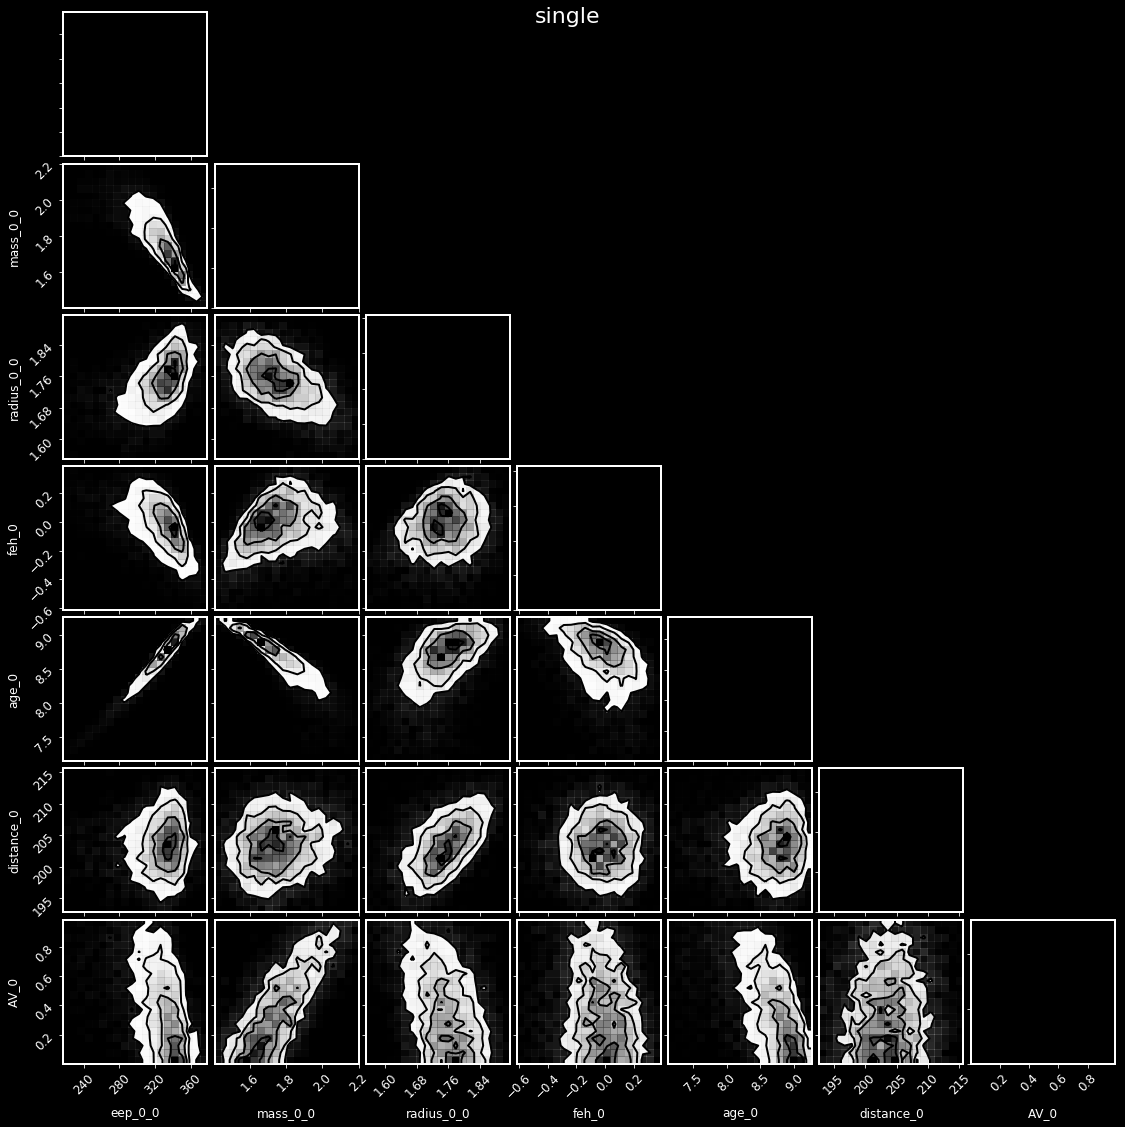

In [32]:
%matplotlib inline

import matplotlib as mpl
mpl.style.use('dark_background')

mod.corner_physical();

In [33]:
mod.prior_transform?

Signature: mod.prior_transform(cube)
Docstring: <no docstring>
File:      ~/repositories/isochrones-dev/isochrones/starmodel.py
Type:      method


In [35]:
cube = [0.2] * 5
mod.prior_transform(cube)

array([ 3.420e+02,  6.026e+00, -3.100e+00,  2.000e+03,  2.000e-01])

In [38]:
from isochrones.mist import MIST_EvolutionTrack
from isochrones.starmodel import BasicStarModel

track = MIST_EvolutionTrack()

mod_evtrack = BasicStarModel(track, J=(8.43, 0.02), H=(8.32, 0.02), K=(8.30, 0.02), parallax=(4.92, 0.1))

In [39]:
mod_evtrack.param_names

('mass', 'eep', 'feh', 'distance', 'AV')

In [41]:
pars_evtrack = [1.2, 300, 0.0, 200, 0.1]
mod_evtrack.lnlike(pars_evtrack)

-4860.480635238232

In [42]:
%timeit mod_evtrack.lnlike(pars_evtrack)

1000 loops, best of 3: 233 µs per loop


In [ ]:
pars2 = []

In [9]:
pars2 = [9.5, -0.52, 200., 0.02, -1.5, 0.3, 0.6]
model.lnprior(pars2), model.lnlike(pars2), model.lnpost(pars2)

(-12.537630162989952, -601.8697889229954, -614.4074190859853)

In [8]:
cube = [0.5] * 7
model.mnest_prior(cube, 7, 7)
model.mnest_loglike(cube, 7, 7)

-11840.735123021514

In [9]:
pickle.dump(model, open('testmodel.pkl', 'wb'))
model = pickle.load(open('testmodel.pkl', 'rb'))

In [10]:
model.lnpost(pars)

-216.85345003562443

In [26]:
model.ic._interp

In [8]:
%timeit model.lnpost([age, feh, distance, AV, alpha, gamma, 0.5])

1 loop, best of 3: 385 ms per loop


In [15]:
model._priors

{'age': <isochrones.priors.FlatLogPrior at 0x102852cf8>,
 'feh': <isochrones.priors.FehPrior at 0x102852ba8>,
 'AV': <isochrones.priors.FlatPrior at 0x1c1bc65080>,
 'distance': <isochrones.priors.PowerLawPrior at 0x1c1bc65048>,
 'alpha': <isochrones.priors.FlatPrior at 0x1c1bc65320>,
 'gamma': <isochrones.priors.FlatPrior at 0x1c1bc652e8>,
 'fB': <isochrones.priors.FlatPrior at 0x1c1bc65278>}

In [7]:
nsamples = 20
for i in range(nsamples):
#     pardict = {k : pr.sample(1)[0] for k,pr in model._priors.items()}
#     pars = [pardict[k] for k in model.param_names]
    cube = [np.random.random() for p in model.param_names]
    model.mnest_prior(cube, 7, 7)
    print('{}: {}'.format([float('{:.2f}'.format(x)) for x in cube], model.mnest_loglike(cube, 7, 7)))

[7.49, -1.36, 840.85, 0.08, -2.61, 0.94, 0.24]: -8650.472829973574
[8.37, -1.89, 1160.27, 0.06, -1.9, 0.25, 0.08]: -10494.460596329816
[6.65, 0.14, 2646.17, 0.04, -2.71, 0.95, 0.48]: -inf
[7.0, -2.54, 2028.74, 0.02, -1.06, 0.58, 0.7]: -14140.558981077918
[6.17, -3.35, 2077.46, 0.01, -2.1, 0.99, 0.44]: -14858.678167224747
[7.55, -3.9, 1732.96, 0.1, -3.56, 0.24, 0.42]: -13734.915826425537
[9.0, -2.1, 710.78, 0.04, -3.25, 0.99, 0.88]: -7515.566409828148
[8.57, -0.55, 518.2, 0.07, -2.48, 0.7, 0.22]: -5357.477644060242
[6.99, -3.79, 2740.38, 0.07, -3.0, 0.25, 0.96]: -15948.92165818422
[10.03, -0.82, 2465.53, 0.06, -3.35, 0.26, 0.75]: -10944.405488103577
[7.83, -1.64, 1530.8, 0.07, -2.53, 0.77, 0.98]: -12054.05209673006
[6.42, -2.68, 1694.24, 0.08, -2.39, 0.26, 0.92]: -13369.626149827485
[6.28, -1.17, 2643.34, 0.09, -1.13, 0.65, 0.81]: -14204.942266149212
[10.12, -2.21, 2714.6, 0.07, -3.98, 0.02, 0.23]: -11237.548779934263
[6.35, -2.12, 1713.66, 0.03, -3.12, 0.41, 0.27]: -13459.108961364422


In [9]:
rand_pars = [9.5, 0.0, 500, 0.1, -2, 0.5, 0.4]
model.lnpost(rand_pars)

-4812.512702328114

In [9]:
import pickle

pickle.dump(model, open('testmodel.pkl', 'wb'))

In [10]:
model = pickle.load(open('testmodel.pkl', 'rb'))

In [11]:
model.lnpost(pars)

AttributeError: 'MIST_Isochrone' object has no attribute '_mag'

In [ ]:
model.fit(overwrite=True)

/Users/tdm/repositories/isochrones/isochrones/cluster.py:119: RuntimeWarning: divide by zero encountered in log
  val = np.log(self._priors[prop](eval(prop)))
ERROR: Interrupt received: Terminating


In [ ]:
! say "sampling complete!"

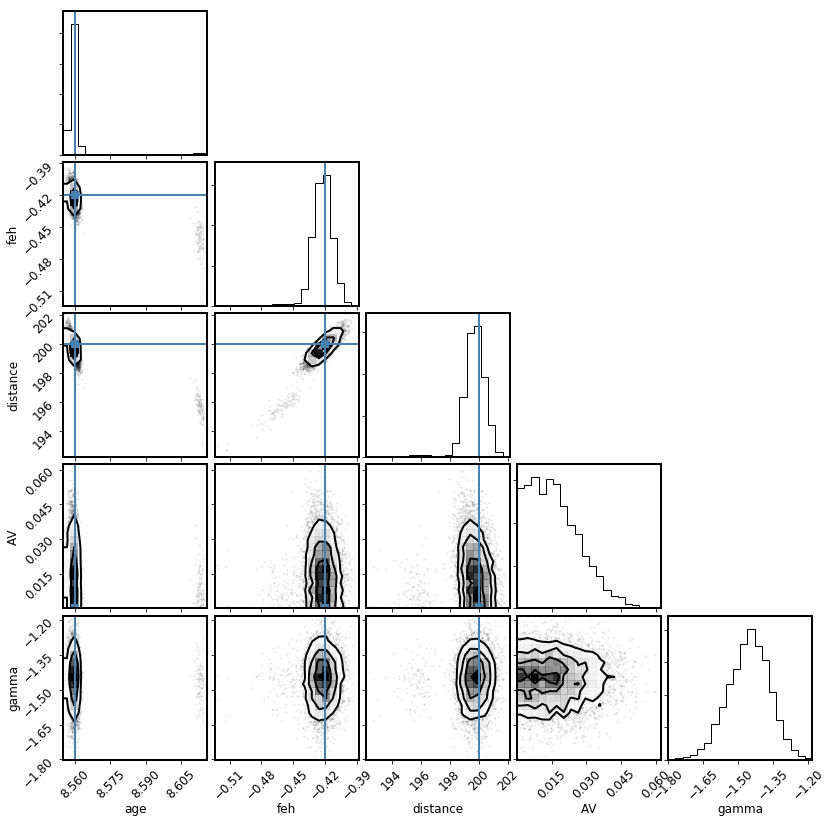

In [30]:
%matplotlib inline
import corner

names = ['age', 'feh', 'distance', 'AV', 'gamma']
fig = corner.corner(model.samples[names], names=names,
                   truths=[age, feh, distance, AV, gamma])

In [13]:
bands = 'rJK'
def band_pairs(bands):
    return [(bands[i], bands[-1]) for i in range(len(bands)-1)]
band_pairs(bands)

[('r', 'K'), ('J', 'K')]

In [14]:
def iso_compare(ic, bands, age1, feh1, dist1, AV1, 
                age2, feh2, dist2, AV2):

    def make_df(iso):
        df = pd.DataFrame()
        for b1, b2 in band_pairs(bands):
            mag1 = iso['{}_mag'.format(b1)]
            mag2 = iso['{}_mag'.format(b2)]

            df[b2] = mag2
            df['{0}-{1}'.format(b1, b2)] = mag1 - mag2
        
        return df
        
    iso1 = ic.isochrone(age1, feh1, distance=dist1, AV=AV1)
    ds1 = hv.Dataset(make_df(iso1))
    
    iso2 = ic.isochrone(age2, feh2, distance=dist2, AV=AV2)
    ds2 = hv.Dataset(make_df(iso2))
    
    layout = []
    for b1, b2 in band_pairs(bands):
        kdims = ['{}-{}'.format(b1, b2), b2]
        layout.append(hv.Points(ds1, kdims) * hv.Points(ds2, kdims))

    return hv.Layout(layout)
    

In [15]:
%%opts Points {+framewise}

from functools import partial

dmap = hv.DynamicMap(partial(iso_compare, ic=mist, bands='rJK'), 
                     kdims=['age1', 'feh1', 'dist1', 'AV1', 'age2', 'feh2', 'dist2', 'AV2'])
age_bounds = model.bounds('age')
feh_bounds = model.bounds('feh')
dist_bounds = model.bounds('distance')
dmap.redim.range(age1=age_bounds, age2=age_bounds, 
                 feh1=feh_bounds, feh2=feh_bounds,
                 dist1=dist_bounds, dist2=dist_bounds)


DynamicMap cannot be displayed without explicit indexing as 'AV1', 'AV2' dimension(s) are unbounded. 
Set dimensions bounds with the DynamicMap redim.range or redim.values methods.

:DynamicMap   [age1,feh1,dist1,AV1,age2,feh2,dist2,AV2]

In [16]:
means = model.samples.mean()
iso_compare(mist, bands='rJK', age1=age, feh1=feh, dist1=distance, AV1=AV,
            age2=means.age, feh2=means.feh, dist2=means.distance, AV2=means.AV)

:Layout
   .Overlay.I  :Overlay
      .Points.I  :Points   [r-K,K]
      .Points.II :Points   [r-K,K]
   .Overlay.II :Overlay
      .Points.I  :Points   [J-K,K]
      .Points.II :Points   [J-K,K]

In [18]:
age2, feh2, dist2, AV2, gamma2 = other_pars

In [19]:
iso_compare(mist, bands='rJK', age1=age, feh1=feh, dist1=distance, AV1=AV,
            age2=age2, feh2=feh2, dist2=dist2, AV2=AV2)

:Layout
   .Overlay.I  :Overlay
      .Points.I  :Points   [r-K,K]
      .Points.II :Points   [r-K,K]
   .Overlay.II :Overlay
      .Points.I  :Points   [J-K,K]
      .Points.II :Points   [J-K,K]

In [15]:
means = model.samples.mean()
means

age             9.493336
feh            -0.226858
distance    49877.166757
AV              0.002651
gamma          -1.358348
lnprob        -54.972238
dtype: float64

In [16]:
mean_pars = [6.85, -1.0, 13300, 0.01, -0.94]
mean_pars = [means.age, means.feh, means.distance, means.AV, means.gamma]
model.lnprior(mean_pars), model.lnlike(mean_pars), model.lnpost(mean_pars)

(-11.165645257906878, -52.74261548012587, -63.90826073803275)

In [17]:
model.lnprior(pars), model.lnlike(pars), model.lnpost(pars)

(-16.641241209353648, -186.79573788050948, -203.43697908986312)

In [19]:
%debug model.lnlike(pars)

NOTE: Enter 'c' at the ipdb>  prompt to continue execution.
> <string>(1)<module>()

ipdb> s
--Call--
> /Users/tdm/repositories/isochrones/isochrones/cluster.py(76)lnlike()
     74         return lnp
     75 
---> 76     def lnlike(self, p):
     77         age = p[0]
     78         feh = p[1]

ipdb> n
> /Users/tdm/repositories/isochrones/isochrones/cluster.py(77)lnlike()
     75 
     76     def lnlike(self, p):
---> 77         age = p[0]
     78         feh = p[1]
     79         distance = p[2]

ipdb> 
> /Users/tdm/repositories/isochrones/isochrones/cluster.py(78)lnlike()
     76     def lnlike(self, p):
     77         age = p[0]
---> 78         feh = p[1]
     79         distance = p[2]
     80         AV = p[3]

ipdb> 
> /Users/tdm/repositories/isochrones/isochrones/cluster.py(79)lnlike()
     77         age = p[0]
     78         feh = p[1]
---> 79         distance = p[2]
     80         AV = p[3]
     81         gamma = p[4]

ipdb> 
> /Users/tdm/repositories/isochrones/isochro